In [1]:
%matplotlib inline
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pylab import rcParams
import pandas as pd
rcParams['figure.figsize'] = 15, 15
import os

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

def removeFiles(path):
    """
    Remove all files in a path.
    """
    files = glob.glob(path+"*")
    for f in files:
        os.remove(f)

0


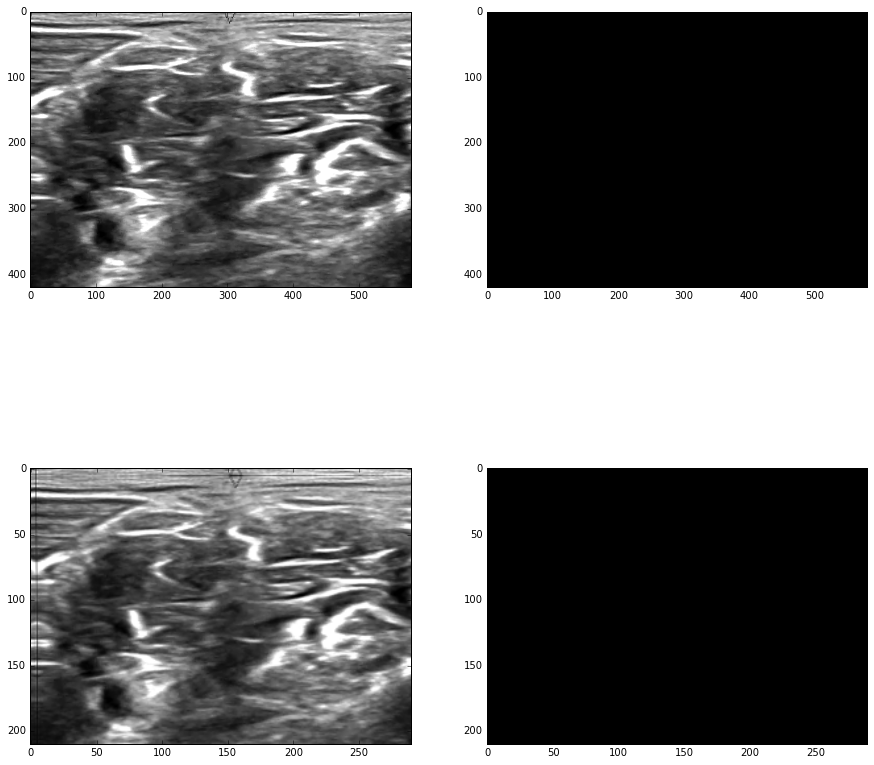

****************************************************************************************************
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


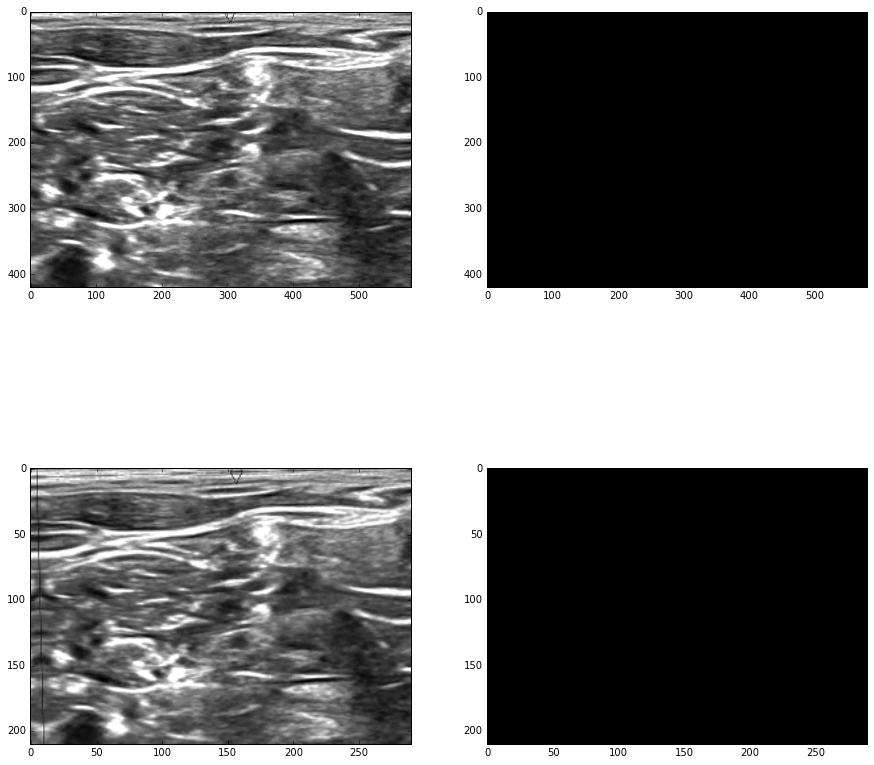

****************************************************************************************************
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000


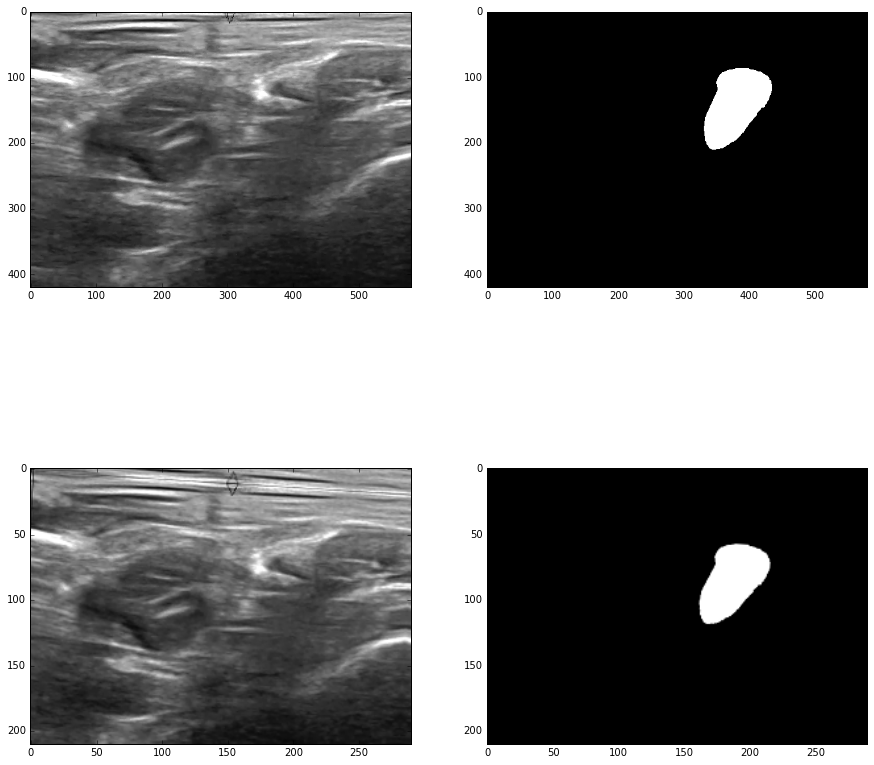

****************************************************************************************************
21000
22000
Total number of files generated = 22540


In [5]:
j = 0
level = 1
writePath = "train/" + str(level) + "/train/"
removeFiles(writePath)
for imgPath in train.img.values:
    imgPath = "train/"+imgPath 
    y = cv2.imread(imgPath,0)
    x = cv2.imread(imgPath.replace("_mask",""),0)
    
    rows,cols = y.shape
    for i in range(5):
        M = cv2.getRotationMatrix2D((cols/2,rows/2),np.random.uniform(-5,5),1)
        tX, tY = np.random.randint(0,20,2)
        M[0,2] = tX
        M[1,2] = tY
        x1,y1 = [cv2.warpAffine(img,M,(cols,rows),borderMode = 4) for img in [x,y]]
        x1,y1 = [cv2.resize(img,None,fx=1.0/np.power(2,level), fy=1.0/np.power(2,level), interpolation = cv2.INTER_CUBIC) for img in [x1,y1]]
        if j % 1000==0:
            print(j)
        if j % 10000 == 0:
            plt.subplot(221)
            plt.imshow(x,cmap=cm.gray)
            plt.subplot(222)
            plt.imshow(y,cmap=cm.gray)
            plt.subplot(223)
            plt.imshow(x1,cmap=cm.gray)
            plt.subplot(224)
            plt.imshow(y1,cmap=cm.gray)
            plt.show()
            print("*"*100)
        j += 1
        cv2.imwrite(writePath + "x_" + str(j) + ".tiff",x1)
        cv2.imwrite(writePath + "y_" + str(j) + ".tiff",y1)
        
print("Total number of files generated = %d" % j)

In [ ]:
import re
writePath = "train/" + str(level) + "/test/"
for imgPath in test.img.values:
    loadPath = "train/"+imgPath 
    level = 1
    x,y = cv2.imread(loadPath.replace("_mask","")),cv2.imread(loadPath)
    x,y = [cv2.resize(img,None,fx=1.0/np.power(2,level), fy=1.0/np.power(2,level), interpolation = cv2.INTER_CUBIC) for img in [x,y]]
    cv2.imwrite(writePath+imgPath.replace("_mask",""),x)
    cv2.imwrite(writePath+imgPath,y)

In [ ]:
writePath+imgPath.replace("_mask","")